## Will it end with a total of 2 or more Goals???
Given a dataset with 21 columns can we use it to predict `Total Goals` above `2`?
Lets load the dataset, do some cleaning if necessary, then EDA, and finally choose the base model and advanced models to use.

In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel('./data/winnings.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date_GMT                               1393 non-null   object 
 1   Country                                1393 non-null   object 
 2   League                                 1393 non-null   object 
 3   Home Team                              1393 non-null   object 
 4   Away Team                              1393 non-null   object 
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64
 7   Home Team Points Per Game (Current)    1393 non-null   float64
 8   Away Team Points Per Game (Current)    1393 non-null   float64
 9   Average Goals                          1393 non-null   float64
 10  BTTS Average                           1393 non-null   int64  
 11  Over

The columns appear to lack null entries, so lets look at columns to drop, and others to standardise.

In [3]:
df.head(10)

,date_GMT,Country,League,Home Team,Away Team,Home Team Points Per Game (Pre-Match),Away Team Points Per Game (Pre-Match),Home Team Points Per Game (Current),Away Team Points Per Game (Current),Average Goals,...,Over05 Average,Over15 Average,Match Status,Home Team Pre-Match xG,Away Team Pre-Match xG,Game Week,Match FootyStats URL,Result - Home Team Goals,Result - Away Team Goals,Total Goals
0,Aug 31 2024 - 11:00pm,USA,USL Championship,Detroit City FC,Hartford Athletic,1.33,0.36,1.31,0.42,2.37,...,96,61,complete,1.07,1.23,28,/usa/hartford-athletic-vs-detroit-city-fc-h2h-...,1,1,2
1,Aug 31 2024 - 11:00pm,USA,USL Championship,Indy Eleven,Pittsburgh Riverhounds,1.42,1.08,1.38,1.07,2.26,...,85,65,complete,1.47,1.22,28,/usa/indy-eleven-vs-pittsburgh-riverhounds-fc-...,1,1,2
2,Aug 31 2024 - 11:00pm,USA,USL Championship,Miami FC,Monterey Bay,0.50,0.83,0.67,0.77,3.08,...,100,81,complete,1.27,1.17,34,/usa/miami-fc-vs-monterey-bay-fc-h2h-stats#729...,1,0,1
3,Aug 31 2024 - 11:00pm,Canada,Canadian Premier League,Atlético Ottawa,Vancouver FC,1.50,1.22,1.64,1.10,3.44,...,100,95,complete,1.50,1.08,21,/canada/atletico-ottawa-vs-vancouver-fc-h2h-st...,1,0,1
4,Aug 31 2024 - 11:00pm,Paraguay,Division Profesional,Guaraní,Cerro Porteño,1.33,2.14,1.39,2.07,2.39,...,89,70,complete,1.35,1.67,9,/paraguay/club-guarani-vs-club-cerro-porteno-h...,1,0,1
5,Aug 31 2024 - 11:00pm,El Salvador,Salvadoran Primera División,Municipal Limeño,FAS,1.80,1.00,1.57,1.25,2.22,...,82,72,complete,1.46,1.50,8,/el-salvador/cd-municipal-limeno-vs-cd-fas-h2h...,1,1,2
6,Aug 31 2024 - 11:30pm,USA,USL Championship,Rhode Island,Birmingham Legion,1.33,1.75,1.46,1.62,2.25,...,84,67,complete,1.62,1.41,28,/usa/birmingham-legion-fc-vs-rhode-island-fc-h...,2,0,2
7,Aug 31 2024 - 11:30pm,USA,USL Championship,North Carolina FC,Louisville City,1.75,1.67,1.71,1.77,2.42,...,84,63,complete,1.36,1.58,28,/usa/north-carolina-fc-vs-louisville-city-fc-h...,4,6,10
8,Sep 01 2024 - 12:00am,Argentina,Prim B Nacional,Gimnasia Jujuy,Club Atlético Güemes,2.07,0.50,2.19,0.47,1.47,...,86,47,complete,1.42,1.13,30,/argentina/gimnasia-y-esgrima-de-jujuy-vs-club...,1,0,1
9,Sep 01 2024 - 12:00am,Chile,Primera División,Everton,Unión Española,1.27,0.90,1.42,0.82,2.39,...,86,67,complete,1.61,1.41,23,/chile/everton-de-vina-del-mar-vs-union-espano...,3,2,5


Lets do some standardizations before we continue with the `EDA`.

In [4]:
df.rename(columns={'date_GMT': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [5]:
df.head()

,date,Country,League,Home Team,Away Team,Home Team Points Per Game (Pre-Match),Away Team Points Per Game (Pre-Match),Home Team Points Per Game (Current),Away Team Points Per Game (Current),Average Goals,...,Over05 Average,Over15 Average,Match Status,Home Team Pre-Match xG,Away Team Pre-Match xG,Game Week,Match FootyStats URL,Result - Home Team Goals,Result - Away Team Goals,Total Goals
0,2024-08-31 23:00:00,USA,USL Championship,Detroit City FC,Hartford Athletic,1.33,0.36,1.31,0.42,2.37,...,96,61,complete,1.07,1.23,28,/usa/hartford-athletic-vs-detroit-city-fc-h2h-...,1,1,2
1,2024-08-31 23:00:00,USA,USL Championship,Indy Eleven,Pittsburgh Riverhounds,1.42,1.08,1.38,1.07,2.26,...,85,65,complete,1.47,1.22,28,/usa/indy-eleven-vs-pittsburgh-riverhounds-fc-...,1,1,2
2,2024-08-31 23:00:00,USA,USL Championship,Miami FC,Monterey Bay,0.50,0.83,0.67,0.77,3.08,...,100,81,complete,1.27,1.17,34,/usa/miami-fc-vs-monterey-bay-fc-h2h-stats#729...,1,0,1
3,2024-08-31 23:00:00,Canada,Canadian Premier League,Atlético Ottawa,Vancouver FC,1.50,1.22,1.64,1.10,3.44,...,100,95,complete,1.50,1.08,21,/canada/atletico-ottawa-vs-vancouver-fc-h2h-st...,1,0,1
4,2024-08-31 23:00:00,Paraguay,Division Profesional,Guaraní,Cerro Porteño,1.33,2.14,1.39,2.07,2.39,...,89,70,complete,1.35,1.67,9,/paraguay/club-guarani-vs-club-cerro-porteno-h...,1,0,1


In [6]:
df = df.drop(columns='Match FootyStats URL')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [7]:
""" 
Encode the teams
"""

home_teams = []
for _ in df['Home Team'].unique():
    home_teams.append(_)
    home_teams.sort()
len(home_teams)

1312

In [8]:
away_teams = []
for _ in df['Away Team'].unique():
    away_teams.append(_)
    away_teams.sort()

len(away_teams)

1316

In [9]:
combined_teams = []

for _ in away_teams:
    if _ not in home_teams:
        home_teams.append(_)
        home_teams.sort()

len(home_teams)

1972

In [10]:
countries = []

for _ in df['Country'].unique():
    _ = _.upper()
    countries.append(_)
    countries.sort()

len(countries)

47

# Exploratory Data Analysis
## Univariate Analysis
Lets look at the distributions of different columns within this dataset.

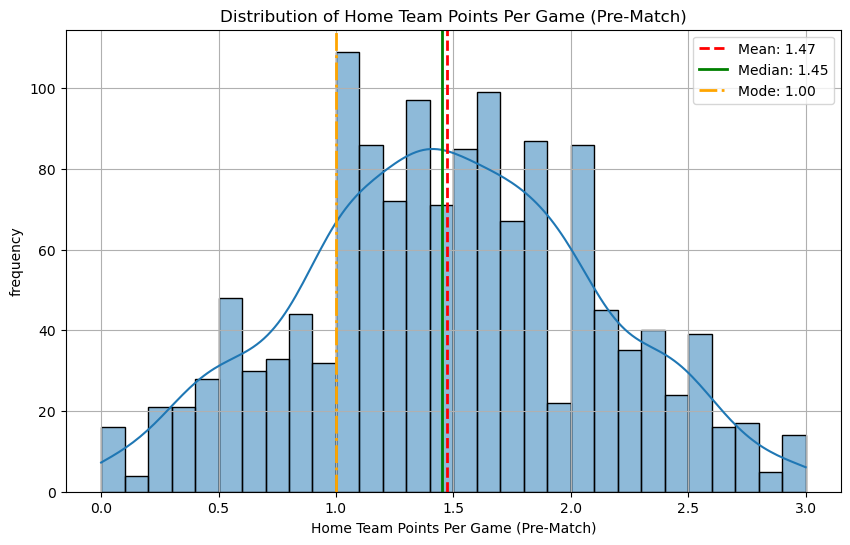

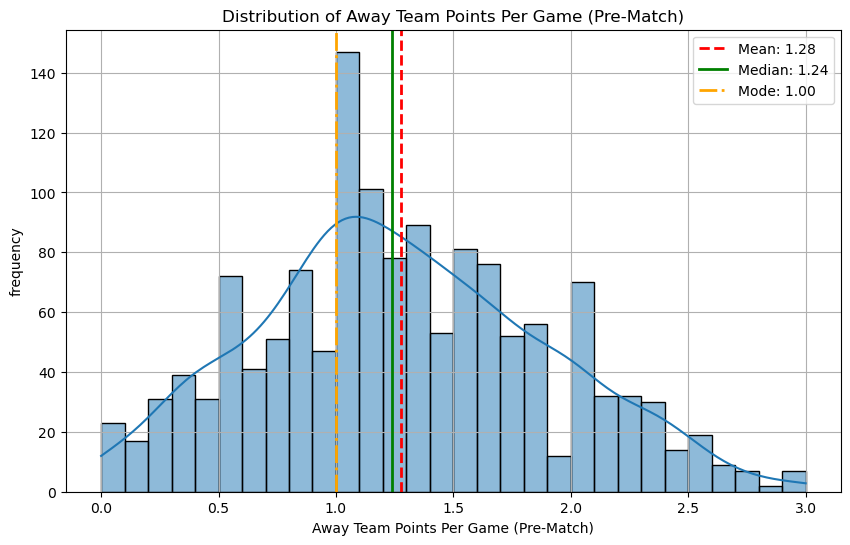

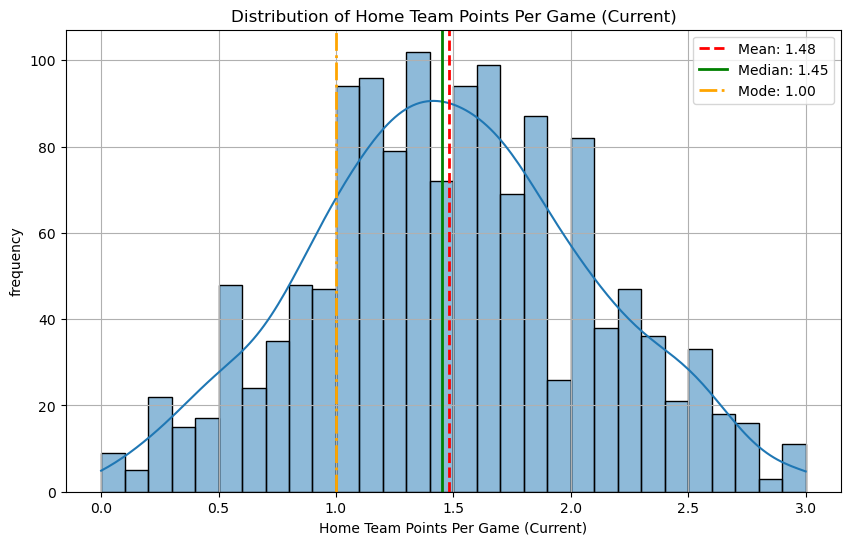

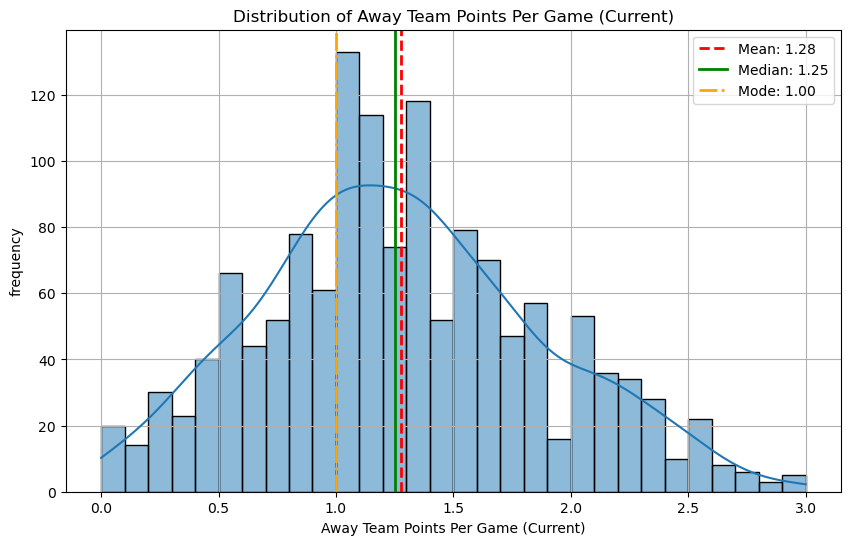

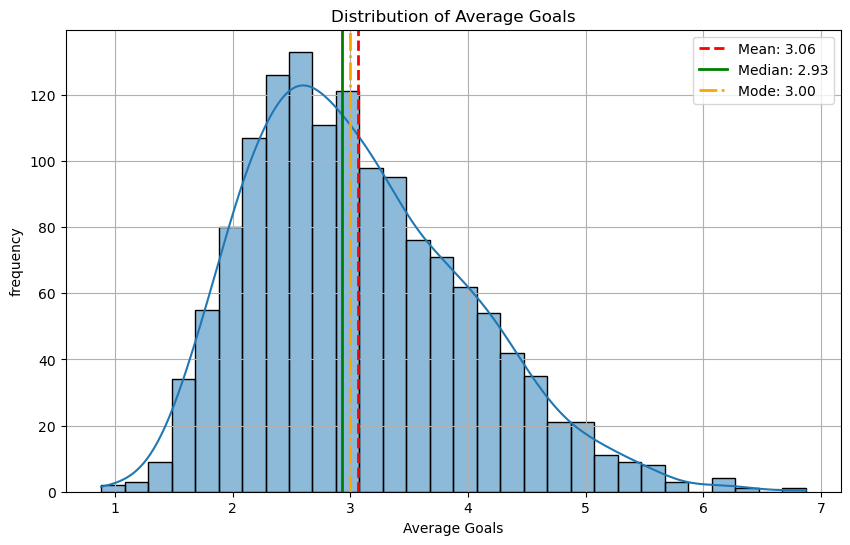

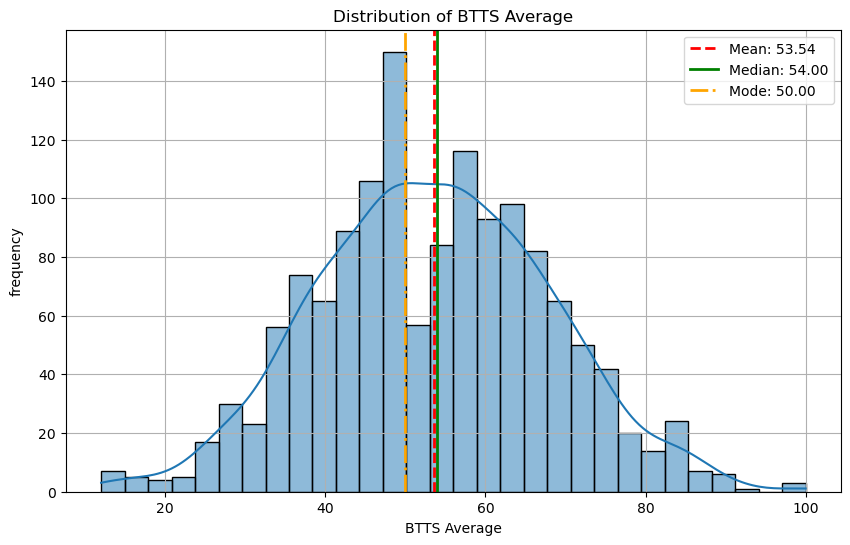

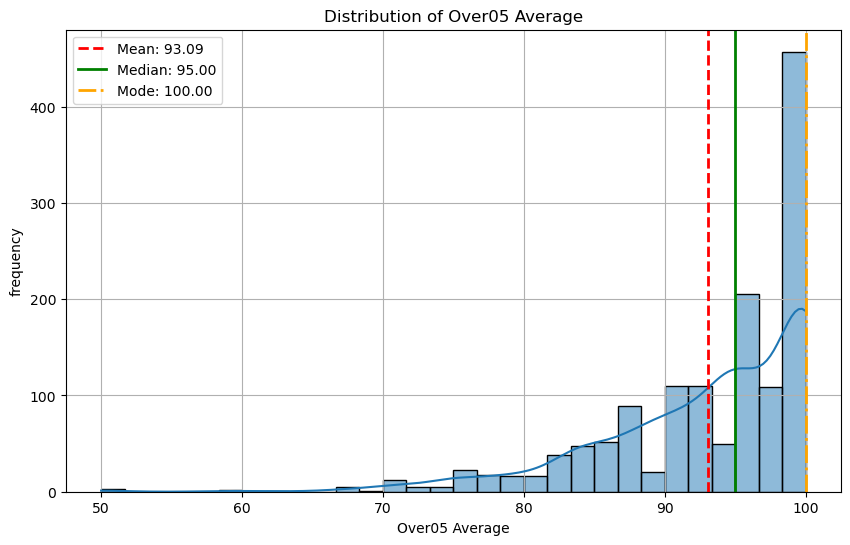

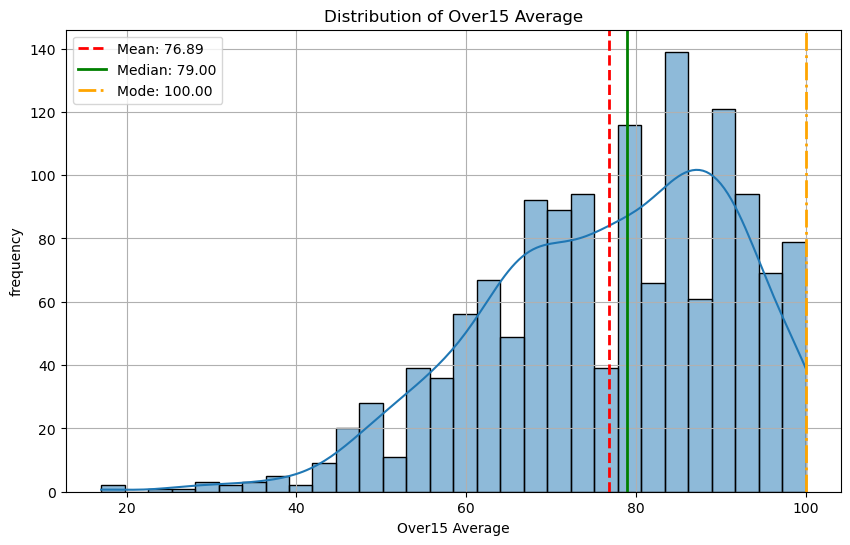

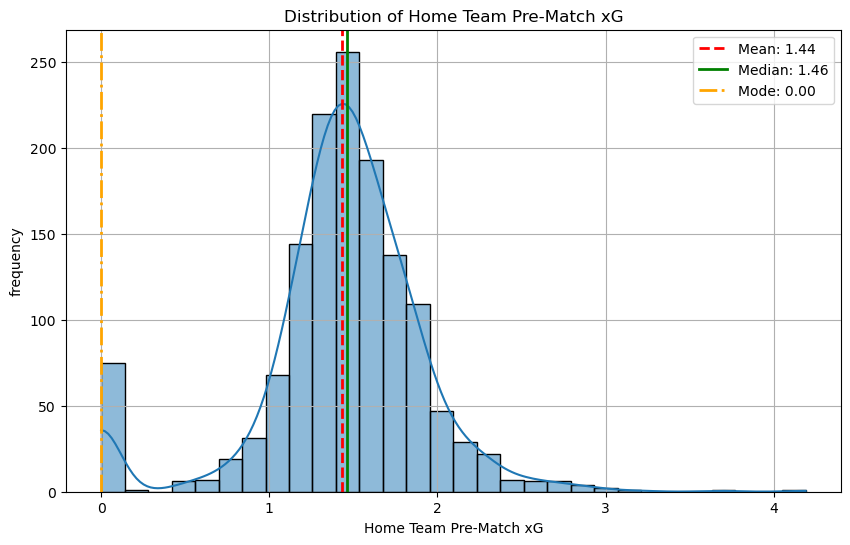

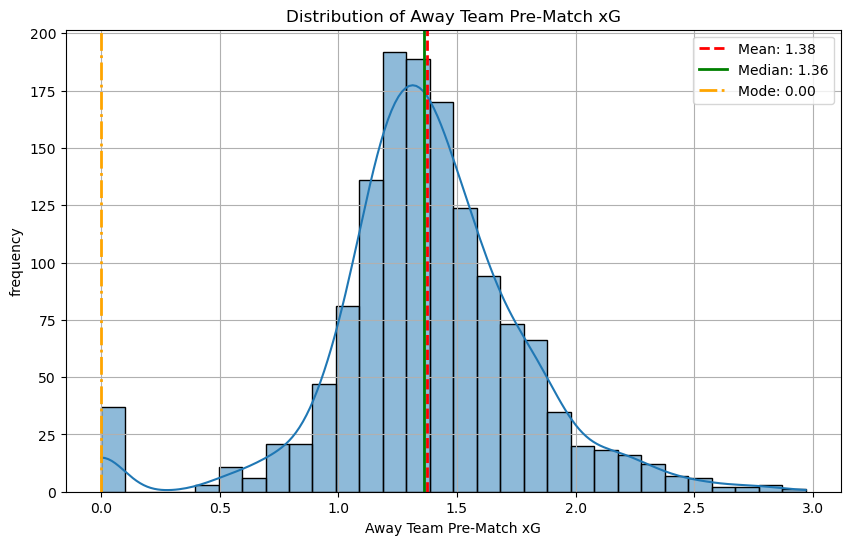

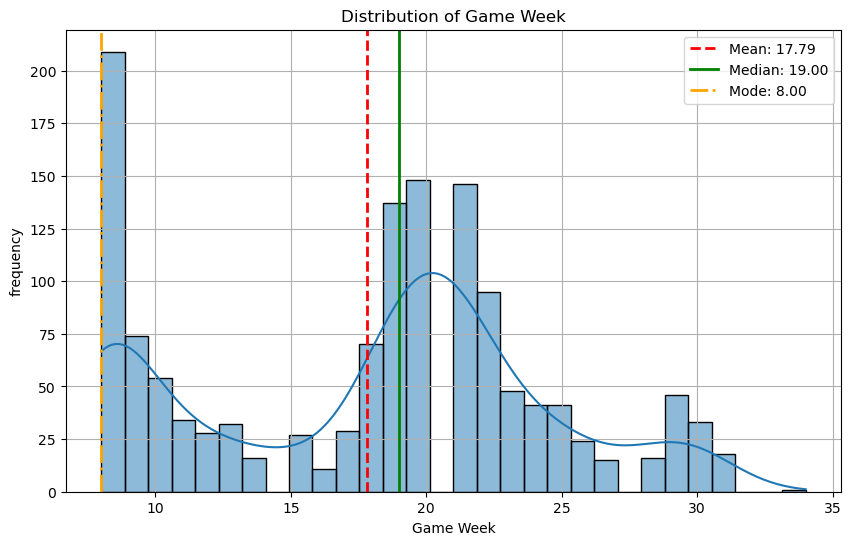

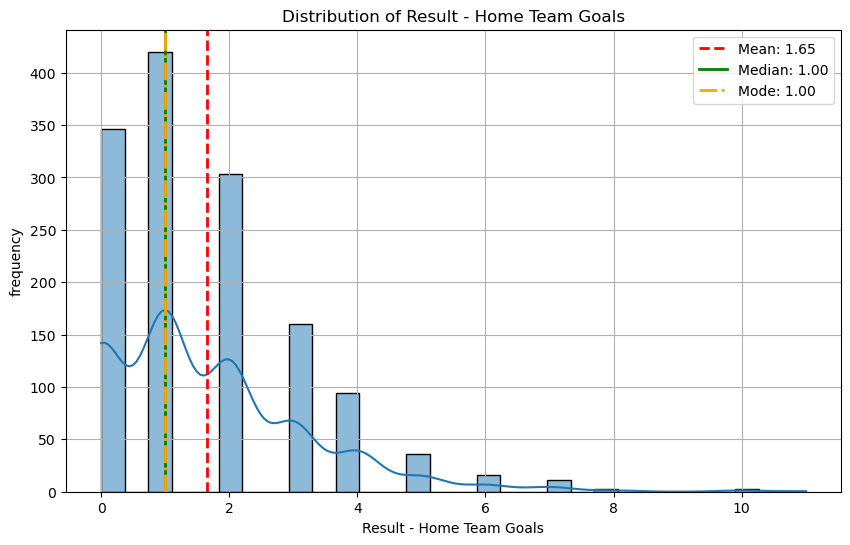

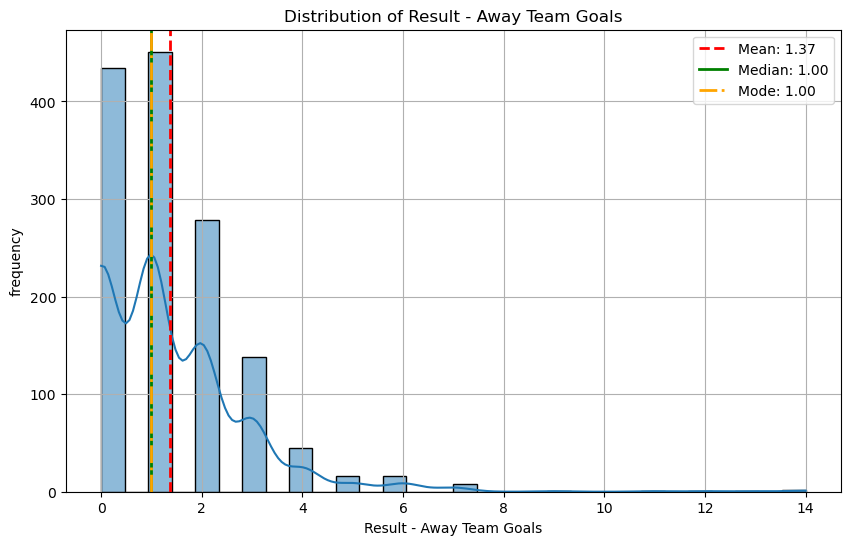

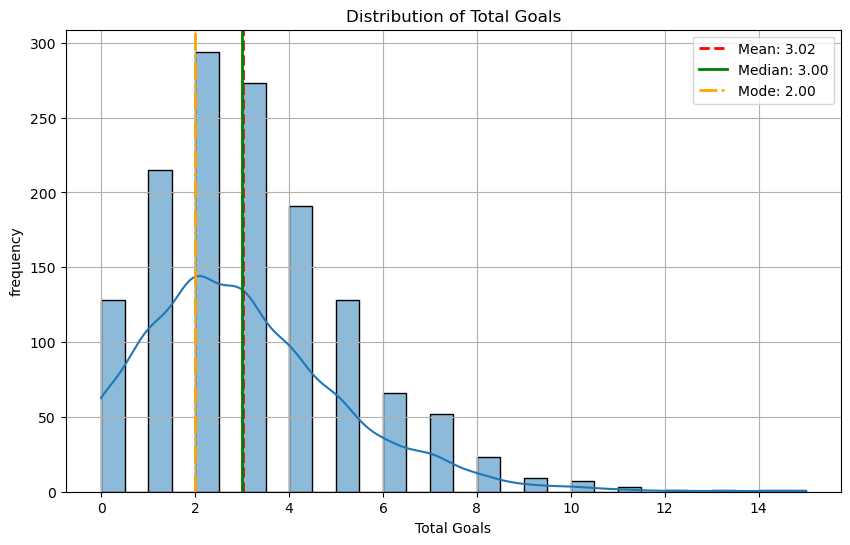

In [11]:
num_columns = df.select_dtypes(include=['float64', 'int64'] ).columns

for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0]

    plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='orange', linestyle='-.', linewidth=2, label=f'Mode: {mode:.2f}')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


Now for the boxplots.

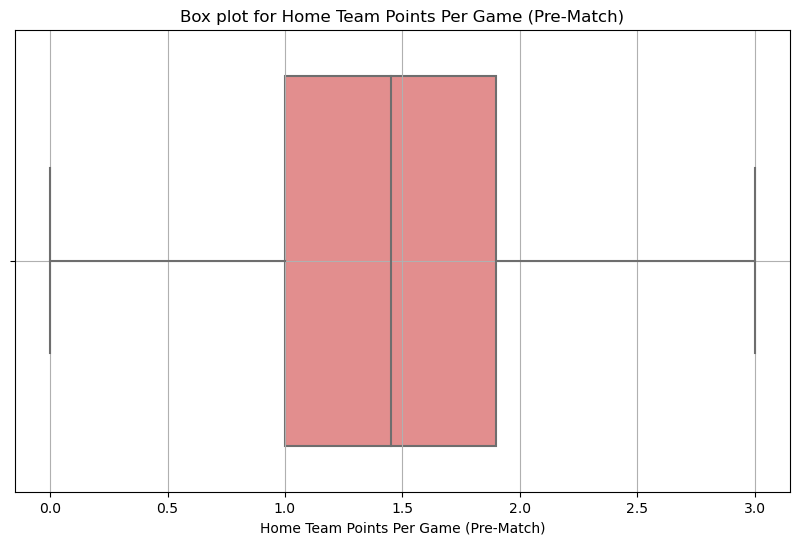

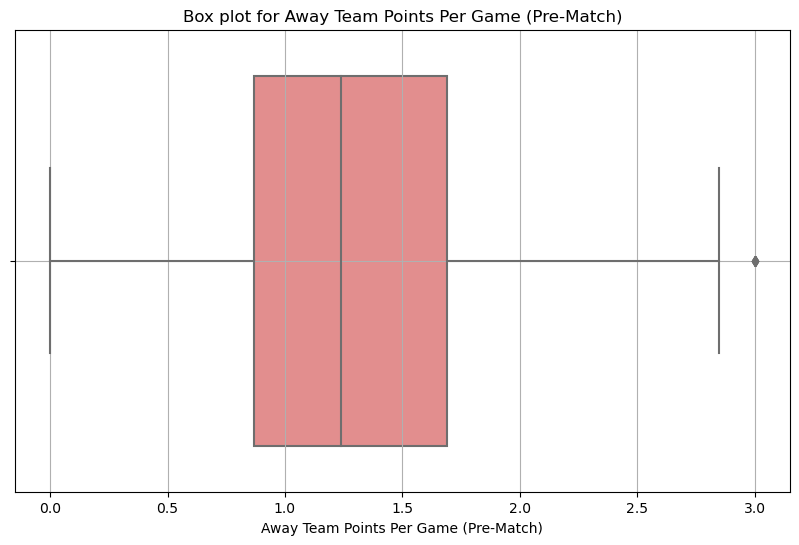

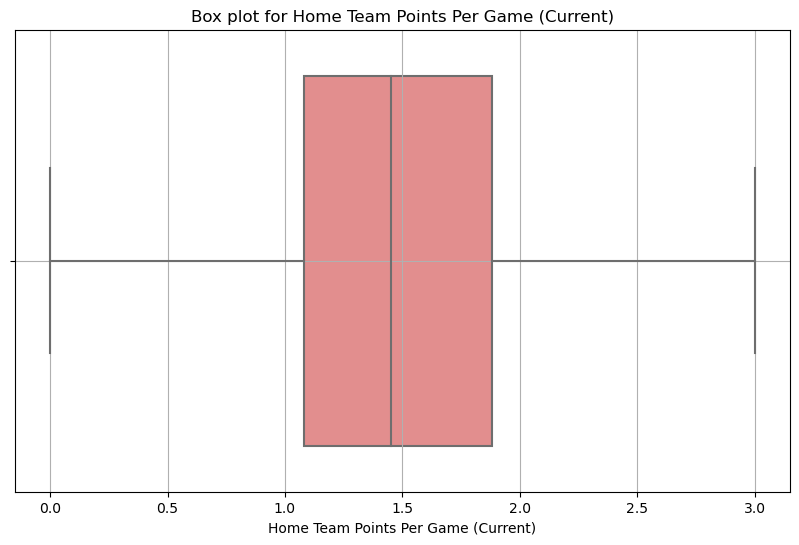

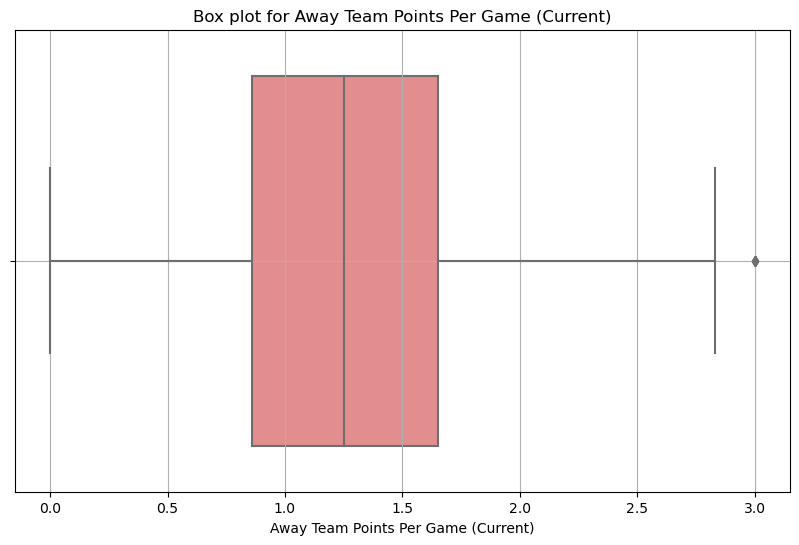

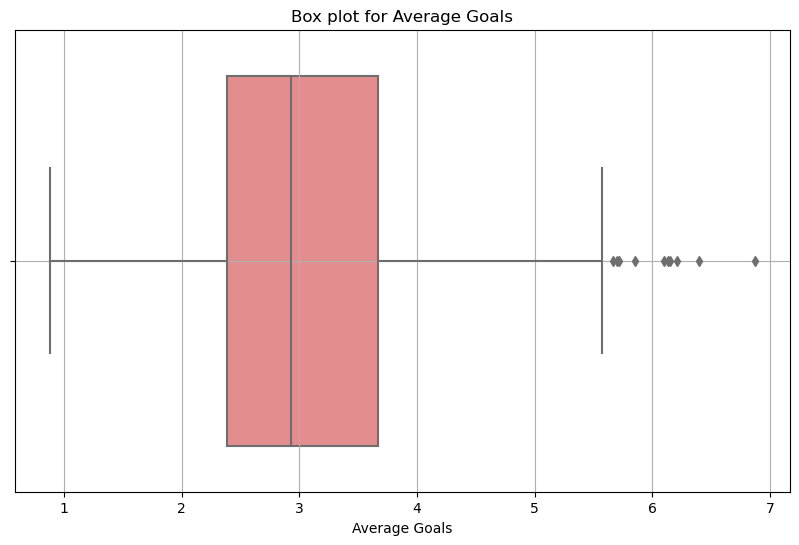

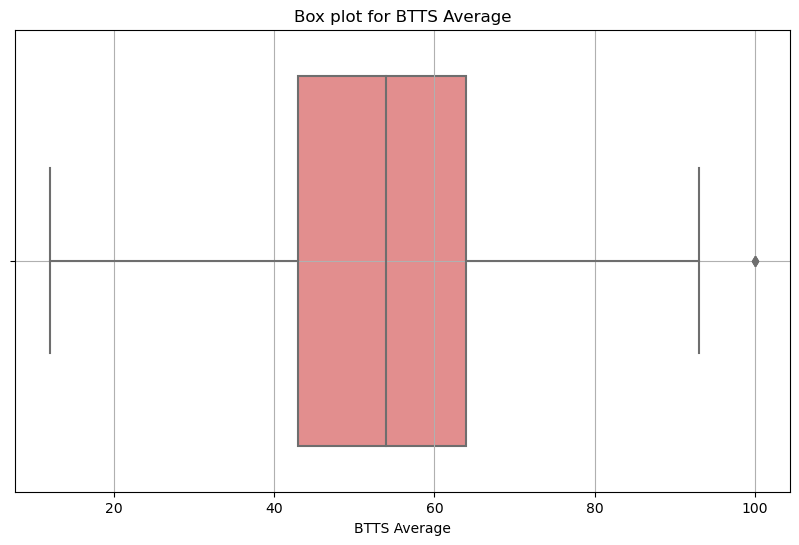

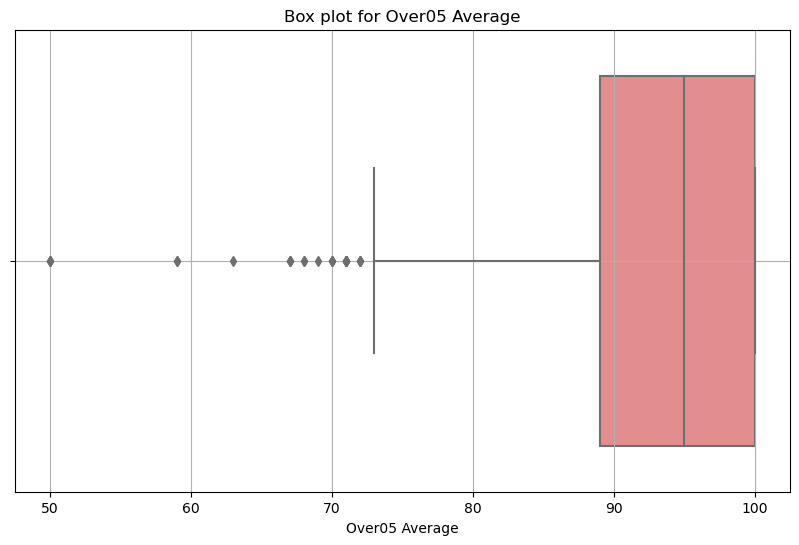

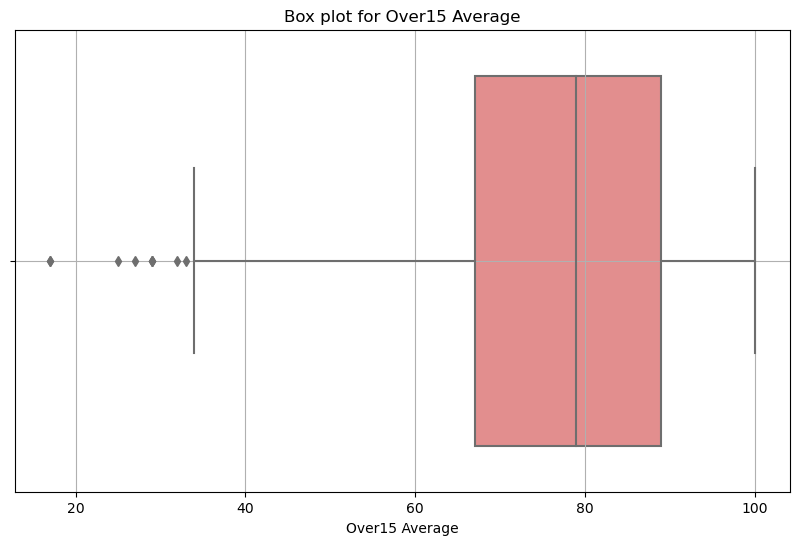

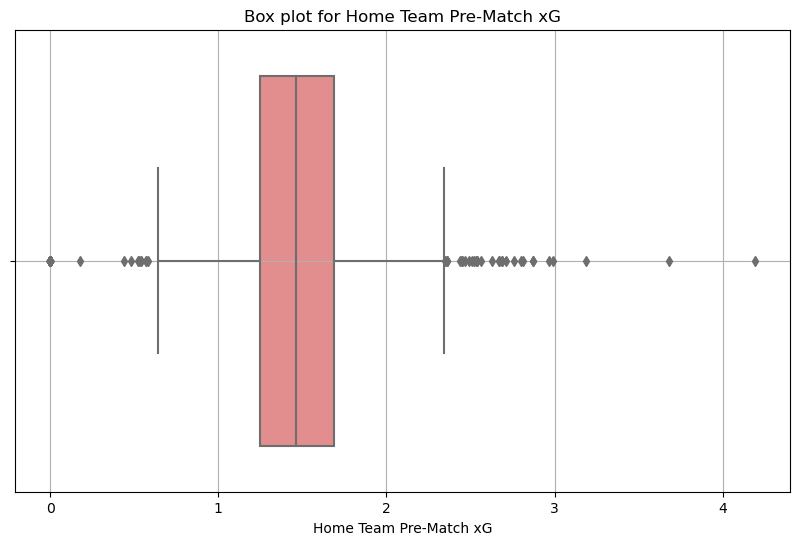

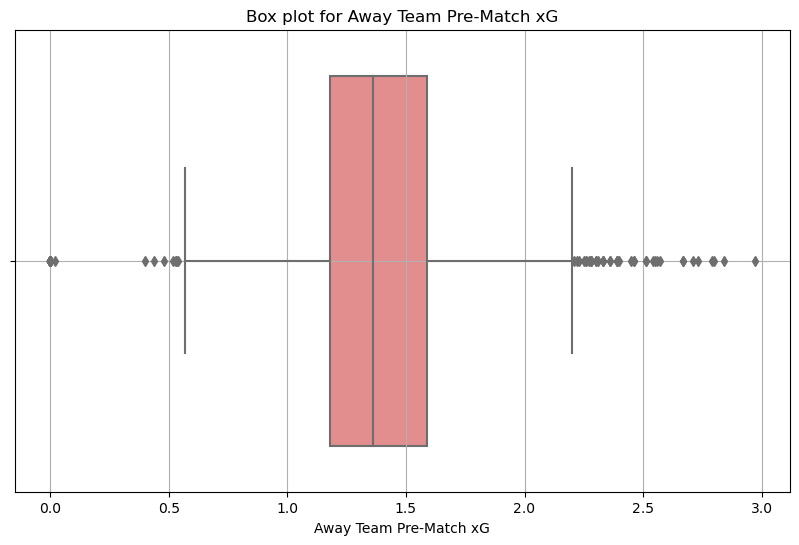

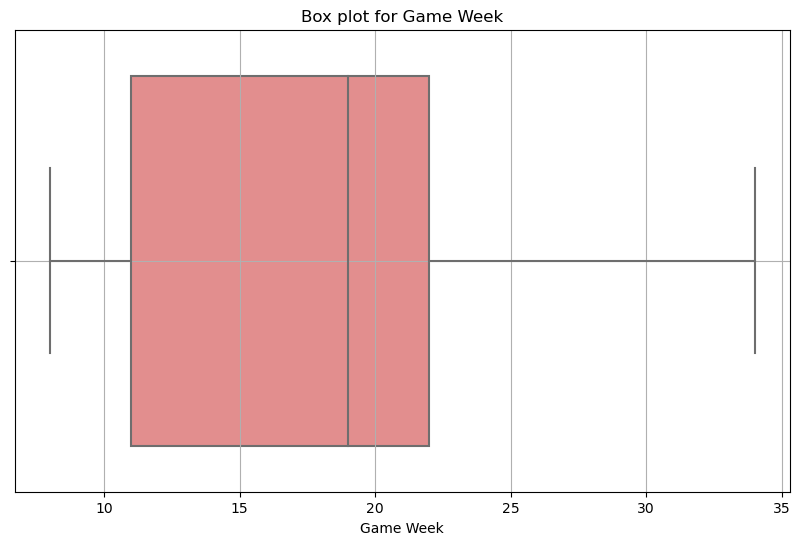

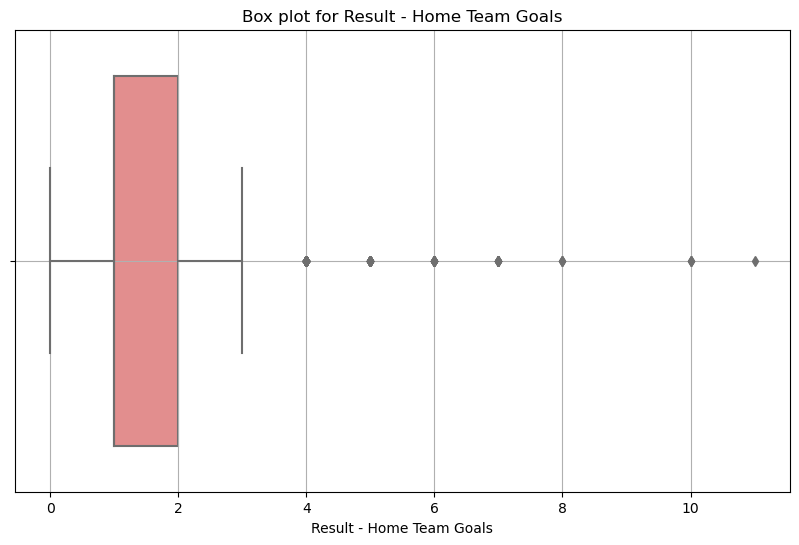

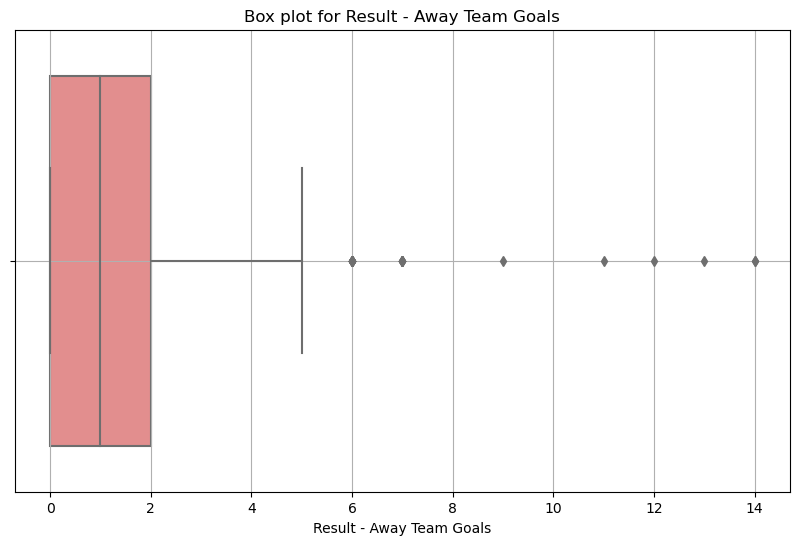

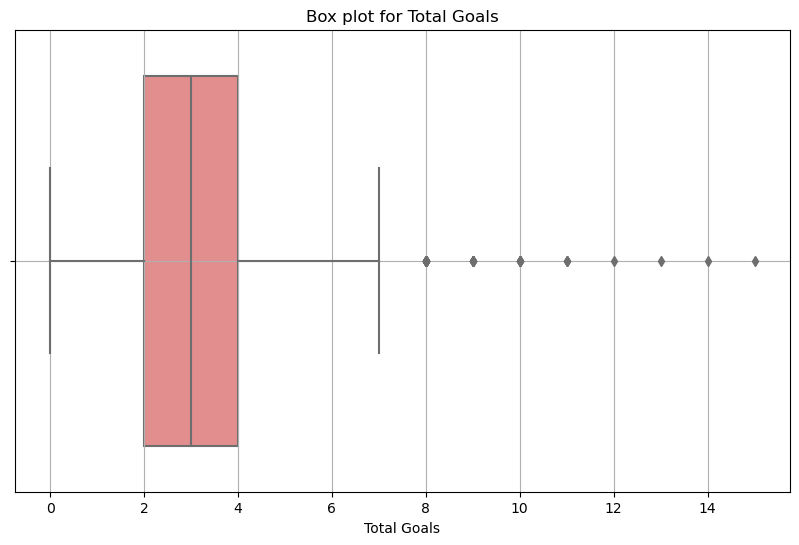

In [12]:
for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f'Box plot for {col}')
    plt.show()

## Bivariate Analysis
Lets look at how different columns relate to each other.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

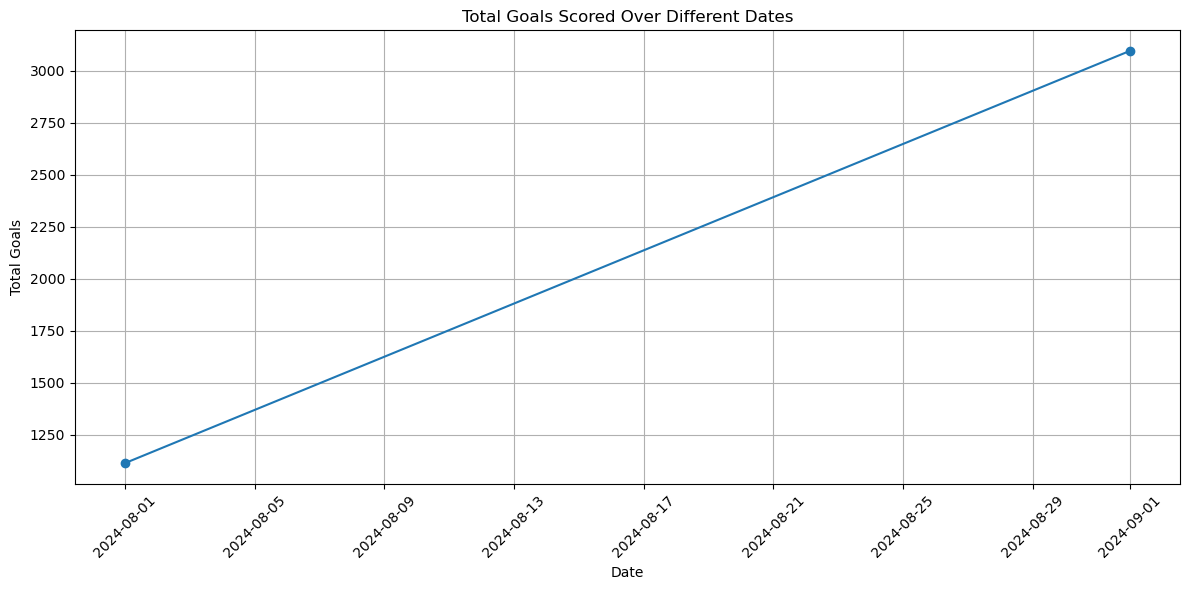

In [14]:
""" 
Visualize trends over time:
    * such as goals scored per match, 
    * team performance metrics
    * average goals per game week.
"""

#we can start with trends over time, first extract the months
df['month_year'] = df['date'].dt.to_period('M')

#group the goals according to months
m_goals = df.groupby('month_year')['Total Goals'].sum().reset_index()

m_goals['month_year'] = m_goals['month_year'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(m_goals['month_year'], m_goals['Total Goals'], marker='o', linestyle='-')
plt.title('Total Goals Scored Over Different Dates')
plt.xlabel('Date')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [16]:
df['month_year'].unique()

<PeriodArray>
['2024-08', '2024-09']
Length: 2, dtype: period[M]

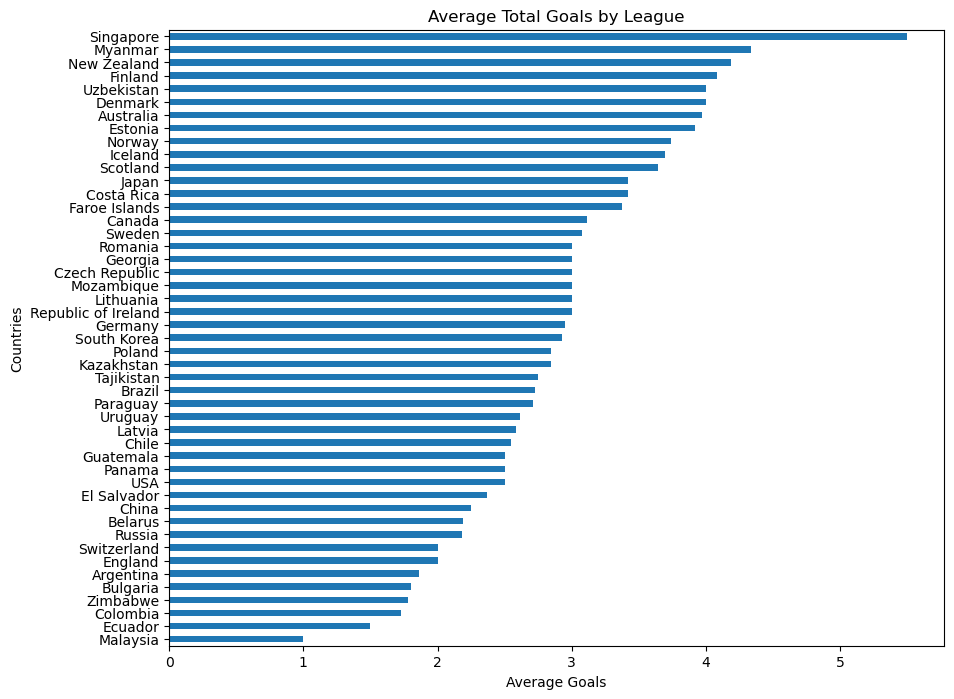

In [17]:
#average goals by country
df.groupby('Country')['Total Goals'].mean().sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Average Total Goals by League')
plt.xlabel('Average Goals')
plt.ylabel('Countries')
plt.show()


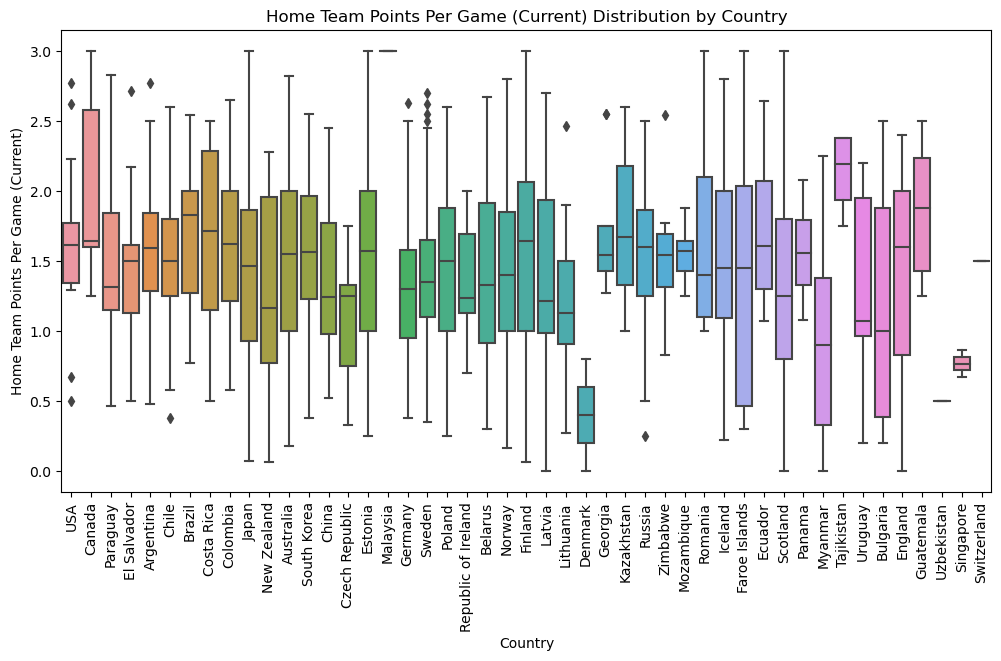

In [18]:
#box plot for continuous variable like home team points per game
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Home Team Points Per Game (Current)', data=df)
plt.xticks(rotation=90)
plt.title('Home Team Points Per Game (Current) Distribution by Country')
plt.show()


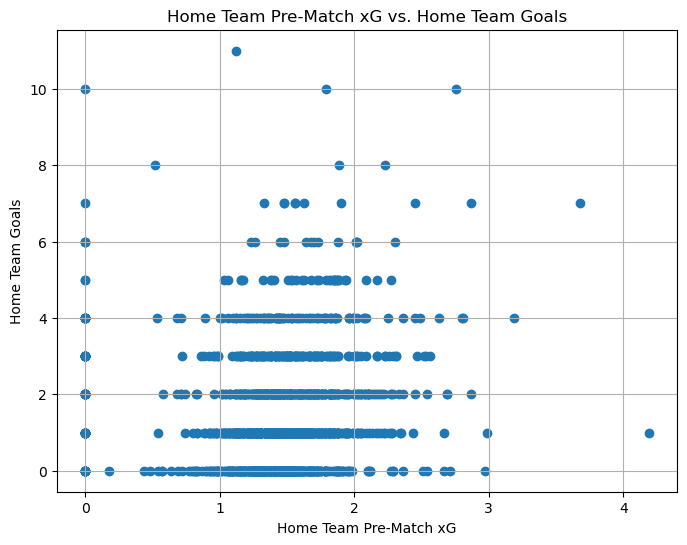

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Home Team Pre-Match xG'], df['Result - Home Team Goals'])
plt.title('Home Team Pre-Match xG vs. Home Team Goals')
plt.xlabel('Home Team Pre-Match xG')
plt.ylabel('Home Team Goals')
plt.grid(True)
plt.show()


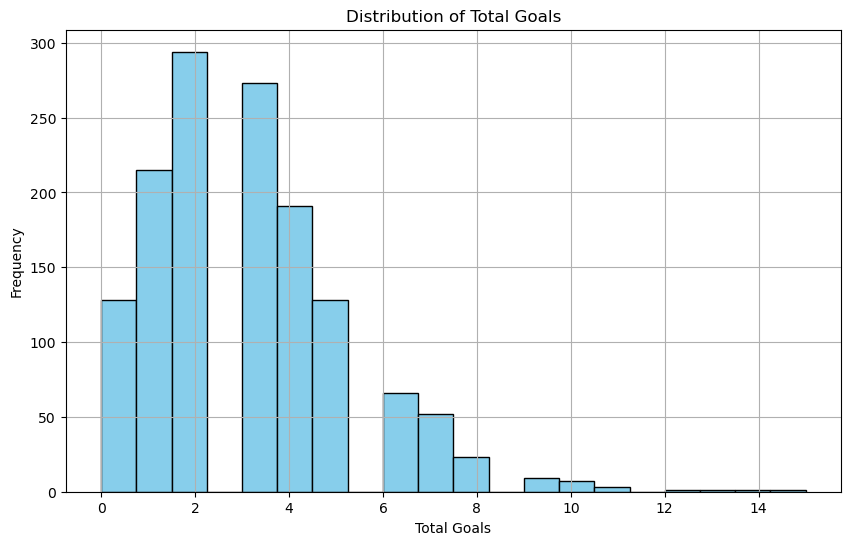

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Total Goals'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Goals')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Lets plot a correlation matrix to see how the different columns relate to each other, from there we'll be able to know which ones to drop and possible do some feature engineering.

/tmp/ipykernel_502000/3278720560.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='coolwarm', vmin=-1, vmax=1)


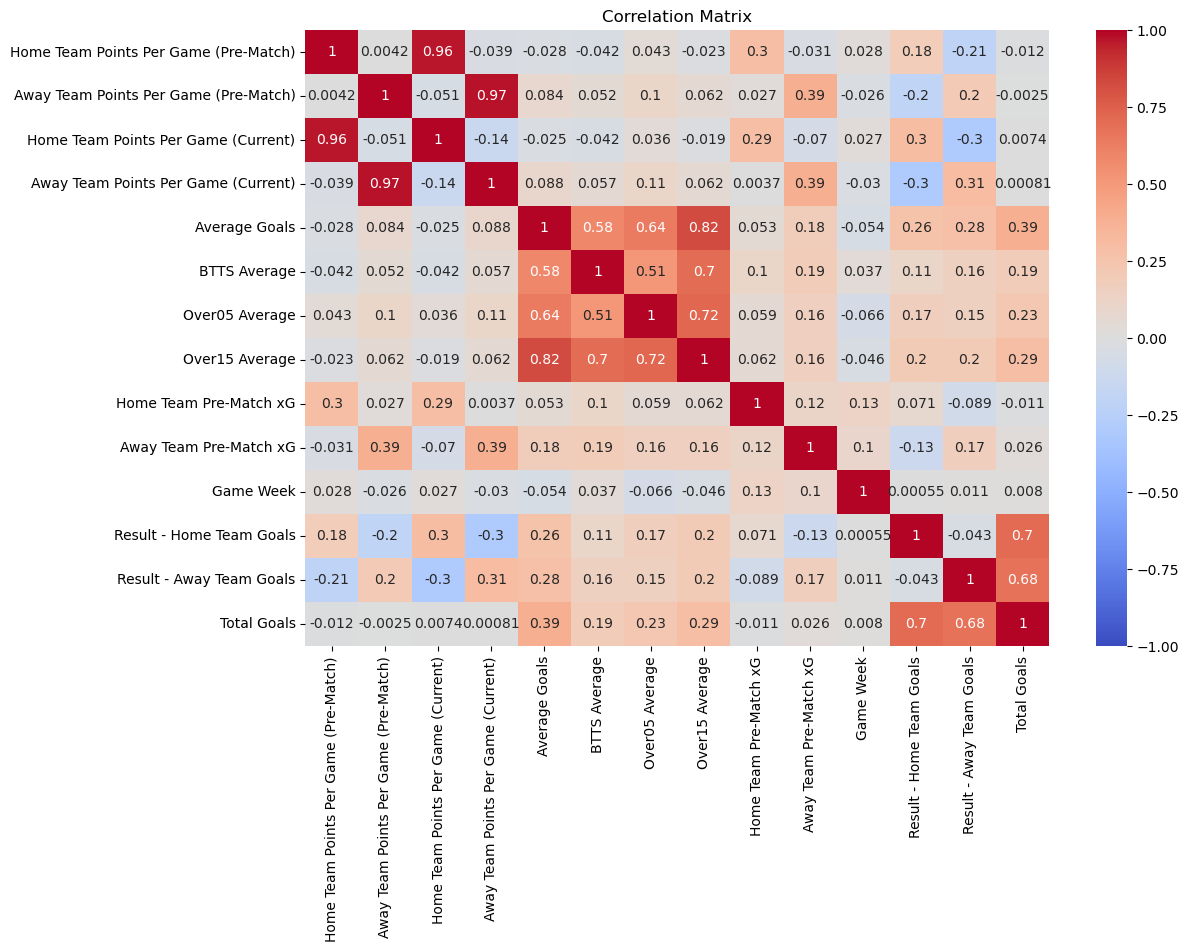

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# Modelling
## Base Model

We'll go with linear regression as the baseline model. The asssumption we are making is that there is a linear relationship between `X`, which are the various columns and `y` the target column in this case the `total goals`.

The goal of this model is to minimize the `Mean Squared Error (MSE)` of the between the predicted and the actual values, for us to confidently say we have an accurate model.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [23]:
num_columns = df.select_dtypes(include=['float64', 'int64', 'period[M]', ] ).columns
type(num_columns)
sample_x = df.drop(columns=num_columns)
sample_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1393 non-null   datetime64[ns]
 1   Country       1393 non-null   object        
 2   League        1393 non-null   object        
 3   Home Team     1393 non-null   object        
 4   Away Team     1393 non-null   object        
 5   Match Status  1393 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 65.4+ KB


In [24]:
#with that set, will start with a base regression model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

#splitting the dataset into train and validation sets
non_numeric_cols = df.select_dtypes(include=['datetime64[ns]', 'object', 'period[M]']).columns

newdf = df.drop(columns='Total Goals')

x = newdf.drop(columns= non_numeric_cols)
y = df['Total Goals']



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 939 to 1126
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Home Team Points Per Game (Pre-Match)  1044 non-null   float64
 1   Away Team Points Per Game (Pre-Match)  1044 non-null   float64
 2   Home Team Points Per Game (Current)    1044 non-null   float64
 3   Away Team Points Per Game (Current)    1044 non-null   float64
 4   Average Goals                          1044 non-null   float64
 5   BTTS Average                           1044 non-null   int64  
 6   Over05 Average                         1044 non-null   int64  
 7   Over15 Average                         1044 non-null   int64  
 8   Home Team Pre-Match xG                 1044 non-null   float64
 9   Away Team Pre-Match xG                 1044 non-null   float64
 10  Game Week                              1044 non-null   int64  
 11  Re

In [26]:
#further split the train data into train and validation
X_train, x_val, Y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=13)

reg = LinearRegression()

reg.fit(X_train, Y_train)


LinearRegression()

In [28]:
score = reg.score(x_val, y_val)
print(f'The R2 score of this model is {score}')

The R2 score of this model is 1.0


The model had an R2 of `1.0` which means its likely overfitting or there is perfect linear relationship between the columns on `X` and our target `Y`.

In [29]:
test_score = reg.score(x_test, y_test)
print("Test R^2 score:", test_score)


Test R^2 score: 1.0


Lets try a different approach of using *k-fold cross validation*.

In [30]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(reg, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV R^2 score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV R^2 score: 1.0


I mean `wow`, this model seems to be *perfect*. Most likely reason is that the dataset was too small and thus the reason for overfittting.

Seeing that its `perfect` there is no need of trying out other models.

Lets deploy this model on streamlit and well finetune it when we get additional datasets.

In [31]:
import joblib
import streamlit as st 


joblib.dump(reg, 'match_pred.pkl')

['match_pred.pkl']

In [ ]:
#deploy on streamlit
reg = joblib.load('./match_pred.pkl')


# Title and description
st.title('Linear Regression Model')
st.write("Input feature values to test the model.")


#input field for each feature
feature_1 = st.number_input('Home Team Points Per Game (Pre-Match)')  
feature_2 = st.number_input('Away Team Points Per Game (Pre-Match)')
feature_3 = st.number_input('Home Team Points Per Game (Current)')
feature_4 = st.number_input('Away Team Points Per Game (Current)')
feature_5 = st.number_input('Average Goals')
feature_6 = st.number_input('BTTS Average')
feature_7 = st.number_input('Over05 Average')
feature_8 = st.number_input('Over15 Average')
feature_9 = st.number_input('Home Team Pre-Match xG')
feature_10 = st.number_input('Away Team Pre-Match xG')
feature_11 = st.number_input('Game Week')
feature_12 = st.number_input('Result - Home Team Goals')
feature_13 = st.number_input('Result - Away Team Goals')

#when the user clicks the "Predict" button
if st.button('Predict'):
    #make predictions based on input values
    input_features = np.array([[
        feature_1,
        feature_2,
        feature_3,
        feature_4,
        feature_5,
        feature_6,
        feature_7,
        feature_8,
        feature_9,
        feature_10,
        feature_11,
        feature_12,
        feature_13,
    ]])
    prediction = reg.predict(input_features)
    
    st.write(f"Predicted Value: {prediction[0]}")

In [ ]:
""" 
to run this streamlit app use this command

streamlit run app.py


ps: transfer this notebook to a file named app.py
"""

`PS` to fix the overfitting, you can generate dummy data from the existing entries of this dataset to help improve the model.